# 1 N体问题的背景
N体问题是指找出已知初始位置r、速度v和质量m的多个物体在经典力学情况下的后续运动。
![9大行星](universe.jpg)

In [44]:
from n_body.universe import Universe
print(Universe.PLANETS)

['SUN', 'MERCURY', 'VENUS', 'EARTH', 'MARS', 'JUPITER', 'SATURN', 'URANUS', 'NEPTUNE', 'MOON']


# 2 设计思路 - 类图
下面的类图给出了n体模拟的设计思路：
![Vector_Body_Universe](Vector_Body_Universe.png)

## 2.1 理解Vector类

In [1]:
from n_body.vector import Vector
x = Vector([1.0, 2.0, 3.0, 4.0]) #视为坐标点向量
y = Vector([5.0, 2.0, 4.0, 1.0]) #另一个坐标点向量
print('x + y    = ' + str(x + y))
print('10x      = ' + str(x.scale(10.0)))
print('|x|      = ' + str(abs(x)))
print('<x, y>   = ' + str(x.dot(y)))
print('|x - y|  = ' + str(abs(x - y)))

x + y    = [6.0, 4.0, 7.0, 5.0]
10x      = [10.0, 20.0, 30.0, 40.0]
|x|      = 5.477225575051661
<x, y>   = 25.0
|x - y|  = 5.0990195135927845


## 2.2 理解Body类和Planet类

In [36]:
from n_body.body import Body, Planet
moon = Body([1.0e04, 4.5e10], [0.5e00, 0.0e00], Planet.MOON.value)
body = Body([0.0e00, 4.5e10], [1.0e04, 0.0e00], (1.5e30, 5.0e10))
print('{}\n{}'.format(moon, body))

f = [Vector([0 ,0])] * 2
f[0] = f[0] + body.force_from(moon)
f[1] = f[1] + moon.force_from(body)
print('{}\n{}'.format(f[0], f[1]))
body.move(f[0], 3) # in three seconds
print(body)

Body([1.00e+04,4.50e+10], [5.00e-01,0.00e+00], 7.35e+19, 1.74e+06)
Body([0.00e+00,4.50e+10], [1.00e+04,0.00e+00], 1.50e+30, 5.00e+10)
[7.353675e+31, 0.0]
[-7.353674999999999e+31, 0.0]
Body([3.04e+04,4.50e+10], [1.01e+04,0.00e+00], 1.50e+30, 5.00e+10)


## 2.3 理解UniBase类(2bodytiny)

In [11]:
from n_body.universe import UniBase
uni = UniBase(2, [0.0e00, 4.5e10, 1.0e04, 0.0e00, 1.5e30, 5.0e10, 0.0e00, -4.5e10, -1.0e04, 0.0e00, 1.5e30, 5.0e10])
print(uni)

Universe['Body([0.00e+00,4.50e+10], [1.00e+04,0.00e+00], 1.50e+30, 5.00e+10)', 'Body([1.00e+04,0.00e+00], [1.50e+30,5.00e+10], 0.00e+00, -4.50e+10)']


## 2.4 理解Universe类(2Planet)

In [7]:
from n_body.body import Planet
from n_body.universe import Universe
id = 1120230306 % 10 + 1
print(eval('Planet.{}.name'.format(Universe.PLANETS[id])), eval('Planet.{}.value'.format(Universe.PLANETS[id])))

uni = Universe(2, id, [0.0e00, 4.5e10, 1.0e04, 0.0e00, 1.0e04, 4.5e10, 0.5e00, 0.0e00])
print(uni)
print(uni.str())

URANUS (8.686e+25, 25559000.0)
Universe6['SATURN', 'URANUS']
Universe6['Body([0.00e+00,4.50e+10], [1.00e+04,0.00e+00], 5.69e+26, 6.03e+07)', 'Body([1.00e+04,0.00e+00], [1.00e+04,4.50e+10], 8.69e+25, 2.56e+07)']


In [8]:
uni.increase_time(12)
print(uni.str())

Universe6['Body([1.20e+05,4.50e+10], [1.00e+04,-3.43e-05], 5.69e+26, 6.03e+07)', 'Body([1.30e+05,5.40e+11], [1.00e+04,4.50e+10], 8.69e+25, 2.56e+07)']


# 3 2Planet模拟

In [46]:
from n_body.universe import Universe
# Simulating two bodies for fixed steps
def simulate(steps, i_th, r_v_list=[0.0e00, 4.5e10, 1.0e04, 1.0e01, 1.0e04, 2.5e10, 2.5e00, 2.0e01], dt=12):
    uni = Universe(2, i_th, r_v_list)
    coords = dict.fromkeys([str(_i) for _i in range(uni.n)], [])
    for i in range(steps):
        uni.increase_time(dt)
        for n in range(uni.n):
            coords[str(n)].append(uni.bodies[n]._r)
    return coords

# Output a brief description of coordinates returned by simulates(steps, i_th, ...)
def print_coordinates(coords):
    for k in coords.keys():
        print('Body{}({}, {}, ..., {})'.format(k, coords[k][0].str(), coords[k][1].str(), coords[k][-1].str()))
        # print('Body{}{}'.format(k, coords[k][0].str()))

In [47]:
coords = simulate(10, 10)
print_coordinates(coords)

Body0([1.20e+05,4.50e+10], [1.30e+05,3.00e+11], ..., [1.21e+06,3.00e+12])
Body1([1.20e+05,4.50e+10], [1.30e+05,3.00e+11], ..., [1.21e+06,3.00e+12])


# 4 N体模拟

In [ ]:
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import animation
from matplotlib.patches import Ellipse, Circle
plt.xscale

In [43]:
from n_body.body import Body

body = Body([.48,.86], [.015,.023], 0.01, 0.5)

def update_body(num, centroids, body, _circle):
    _circle.set_color('gray')
    # Update ball position and draw it there.
    centroids.append(body._r)
    vx,vy = body._v
    if abs(body._r[0] + body._v[0]) + radius > 1.0:
        vx = -body._v[0]
    if abs(body._r[1] + body._v[1]) + radius > 1.0:
        vy = -body._v[1]
    body._r = (body._r[0]+vx, body._r[1]+vy)
    _circle.set_center(body._r)
    _circle.set_color('blue')
    return _circle,

AttributeError: 'Body' object has no attribute '_radius'

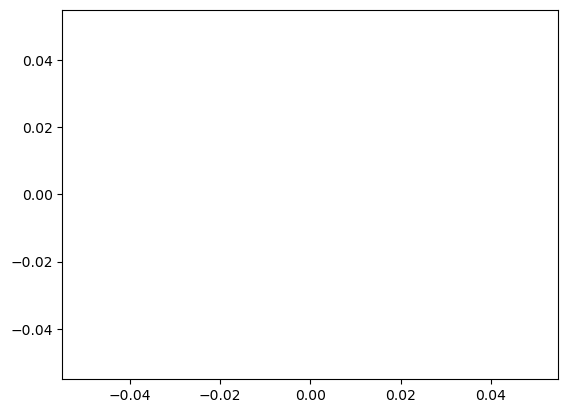

In [44]:
import matplotlib.pyplot as plt
import matplotlib.animation as animation

fig1 = plt.figure()

# Fixing random state for reproducibility
np.random.seed(19680801)

data = np.random.rand(2, 25)
l, = plt.plot([], [], 'r-')
centroids = []
_circle = plt.Circle(body._r, body._radius, color='b', linewidth=0)
plt.xlim(0, 1)
plt.ylim(0, 1)
plt.xlabel('x')
plt.title('test')
line_ani = animation.FuncAnimation(fig1, update_body, 25, fargs=(centroids, body, _circle),
                                   interval=50, blit=True)